In [1]:
# !pip install sklearn

In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter
import time
import copy
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [4]:
la = LabelEncoder()

In [3]:
os.chdir('G:\내 드라이브\제주_전기차\data')

In [5]:
# ls

In [4]:
df_train = pd.read_csv('전기차_전처리및토큰화.csv')

In [8]:
# df_train.to_csv('전기차_전처리및토큰화.csv',index=False)

In [5]:
df_train.isnull().sum()

전처리    0
평가     0
dtype: int64

In [6]:
train_data, test_data = train_test_split(df_train, test_size = 0.25, random_state = 42)


In [7]:
train_data

,전처리,평가
382913,안녕하다 전기차 동호회 가입 인사 자기 소개 이번 코 나 계약 한 신입 이다 한글 ...,P
322973,한글 변경 신 고변 경전 메 액션 변경 후 메 액션 충남,E
226465,볼트 풀옵 세이 프티 포함 구합 니 다 경기도 안산 이고 주소 상 부산 이다 키 로...,E
82421,아이오 닉 년 식 년 월 등록 파다 만원 아이오 닉 년 식 년 월 등록 파다 만원 ...,P
84988,드디어 스타코 프 에서 차지 스타 출시 돼다 ㄷㄷㄷ 사전 물량 원 이라니 가격 어마...,N
...,...,...
259178,서울 보조금 줄 건 가요 이라고 써다 욤,E
365838,안녕하다 자기 소개 안녕하다 전기차 관심 많다 가입 하다 지역 서울 송파구 한글 별...,P
131932,트론 실물 보다 넘다 이쁘다 너무 이쁘다 테슬라 이제 흔하다 보이다 것 같다,P
146867,서울 륜 장기 렌트 보조금 없다 취소 하다 ㅠ 아마존 카 에서 계약 한 건대 오늘 ...,E


In [8]:
test_data

,전처리,평가
198025,충전 자리 문의 관련 되다 주제 대해 미리 카페 내 검색 하다 보다 네 아니다 전기...,N
352104,가입 인사 드리다 자기 소개 안녕하다 트론 차주 이다 지역 울 명 한글 별명 뜻 하...,P
299466,오늘 날씨 좋다 전 비도 좋다 딸 운전 연 수주 인데 킬로 넘다 타다 ㅋ,P
305876,아이오 닉 아이오 닉 주행 거리 늘 가능성 없다,E
145782,보조금 신청 관련 하다 관련 되다 주제 대해 미리 카페 내 검색 하다 보다 네 아니...,N
...,...,...
40482,드뎌 아이오 닉 모니터 형 거치 대 구해 서 설치 완료 아이오 닉 딱 맞다 모니터 ...,P
214305,전기차 중고 거래 시 환경부 카드 및 하이패스 관련 문의 질문 하다 전 먼저 카페 ...,P
128990,환경부 카드 개 신한카드 개 관련 되다 주제 대해 미리 카페 내 검색 하다 보다 네...,P
213410,년 월일 등록 한 코 나 이다 대전 에서 등록 하다 전국 이전 하다 언제 부터 가능하다,E


<AxesSubplot:>

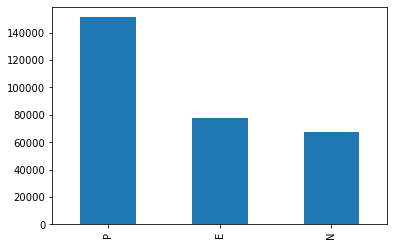

In [9]:
train_data['평가'].value_counts().plot(kind = 'bar')

In [10]:
print(train_data.groupby('평가').size().reset_index(name = 'count'))


  평가   count
0  E   77427
1  N   67318
2  P  151338


In [11]:
# negative_words = np.hstack(train_data[train_data.평가== 0]['tokenized'].values)
# positive_words = np.hstack(train_data[train_data.평가l == 1]['tokenized'].values)

In [12]:
X_train = train_data['전처리'].values
y_train = train_data['평가'].values
X_test= test_data['전처리'].values
y_test = test_data['평가'].values

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)


In [14]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 82548
등장 빈도가 1번 이하인 희귀 단어의 수: 34239
단어 집합에서 희귀 단어의 비율: 41.47768571013229
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.1915514503816623


In [15]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 48311


In [16]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [17]:
print(X_train[:3])
print(X_test[:3])

[[52, 4, 263, 13, 96, 84, 73, 228, 63, 24, 17, 22, 1609, 8, 61, 43, 76, 183, 43, 8, 49, 3, 4, 63, 24, 16, 1368, 2683, 4, 27, 205, 142, 170, 156, 17, 13, 60, 17, 53, 4, 117, 247, 13, 2, 2, 33, 80, 91, 57, 43, 4, 176, 16, 61, 43, 155, 22, 53, 13, 96, 368, 82, 154], [61, 155, 819, 6137, 3103, 3607, 9359, 155, 53, 3607, 9359, 1166], [106, 872, 1413, 1435, 123, 999, 64, 51, 539, 2097, 329, 876, 216, 338, 8, 313, 6, 42, 21, 223, 21, 223, 21, 223, 25, 1355, 95, 10, 55, 9, 153, 57]]
[[7, 551, 214, 90, 5, 191, 117, 131, 87, 46, 108, 2, 9, 71, 39, 4, 171, 16, 63, 24, 103, 111, 5201, 1946, 359, 7, 2118, 741, 326, 1, 83, 2019, 929, 563, 262, 89, 192, 551, 109, 11, 3, 523, 10, 12224, 543, 7, 551, 543, 163, 1349, 95, 11, 220, 192, 2, 4488, 28, 23, 543, 7, 3848, 543, 3, 1853, 1849, 192, 119, 144, 2821, 29, 28, 23, 3048, 7, 22169, 3048, 3048, 12224, 1819, 81, 1539, 551, 192, 2, 620, 5368, 192, 2, 5717, 30, 2761, 59, 40, 28, 23, 7, 157, 245, 314, 119, 2, 7296, 2, 192, 2, 289, 22, 1152, 1806, 192, 551, 

리뷰의 최대 길이 : 6176
리뷰의 평균 길이 : 60.37013607670822


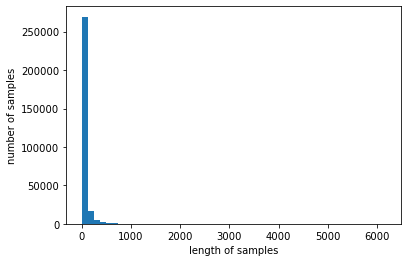

In [18]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [19]:
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [20]:
max_len = 500
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 500 이하인 샘플의 비율: 99.19346939878345


In [21]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [22]:
y_train

array(['P', 'E', 'E', ..., 'P', 'E', 'P'], dtype=object)

In [23]:
la.fit(y_train)
y_train_la = la.transform(y_train)
y_test_la = la.transform(y_test)

In [24]:
la.inverse_transform(y_train_la)

array(['P', 'E', 'E', ..., 'P', 'E', 'P'], dtype=object)

In [25]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train_la, epochs=2, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/2
3701/3702 [============================>.] - ETA: 0s - loss: 0.0000e+00 - acc: 0.2273
Epoch 1: val_acc improved from -inf to 0.22760, saving model to best_model.h5
3702/3702 [==============================] - 286s 76ms/step - loss: 0.0000e+00 - acc: 0.2273 - val_loss: 0.0000e+00 - val_acc: 0.2276
Epoch 2/2
3701/3702 [============================>.] - ETA: 0s - loss: 0.0000e+00 - acc: 0.2273
Epoch 2: val_acc did not improve from 0.22760
3702/3702 [==============================] - 273s 74ms/step - loss: 0.0000e+00 - acc: 0.2273 - val_loss: 0.0000e+00 - val_acc: 0.2276
